<a href="https://colab.research.google.com/github/pponvannan/AIMLMadeEasy/blob/master/AIML_Classification_Assignment_4_SVM_2019AIML525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIML Classification Assignment 3

## **Support Vector Machine Assignment**

### **Q-1: 1.	Read the dataset** 

In [487]:
#from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Import the datasets

In [488]:
#import the data set (Loan Data) 
df = pd.read_csv("Diabetes.csv")

Displaying the column names and displaying the header

In [489]:
print(df.columns)
# Displaying header
df.head(3)


Index(['No. of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)'],
      dtype='object')


,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [490]:
# changing cols with rename() 
df = df.rename(columns = {"No. of times pregnant": "Pregnancies",
                          "Plasma glucose concentration": "Glucose",
                          "Diastolic blood pressure (mm Hg)": "BloodPressure",
                          "Triceps skin fold thickness (mm)": "SkinThickness",
                          "2-Hour serum insulin (mu U/ml)": "Insulin",
                          "Body mass index (weight in kg/(height in m)^2)": "BMI",
                          "Diabetes pedigree function": "DiabetesPedigreeFunction",
                          "Age (years)": "Age",
                          "Class variable (0 or 1)": "Outcome"
                          },inplace=False) 



In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**(a) Lookout for missing values Validation Null and Zero**

In [492]:
def missing_values_tables(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n There are " + str(mis_val_table_ren_columns.shape[0]) +  " columns that have missing values.")
    return mis_val_table_ren_columns

In [493]:
missing_values_tables(df)

Your selected dataframe has 9 columns.
 There are 0 columns that have missing values.


,Missing Values,% of Total Values


**So there is no Null Values. so we can move to validation of Zero**

**Validating Zero values in the column**

In [494]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Replace Zero values to NaN and try to replace with Median or Mean values.**

In [495]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

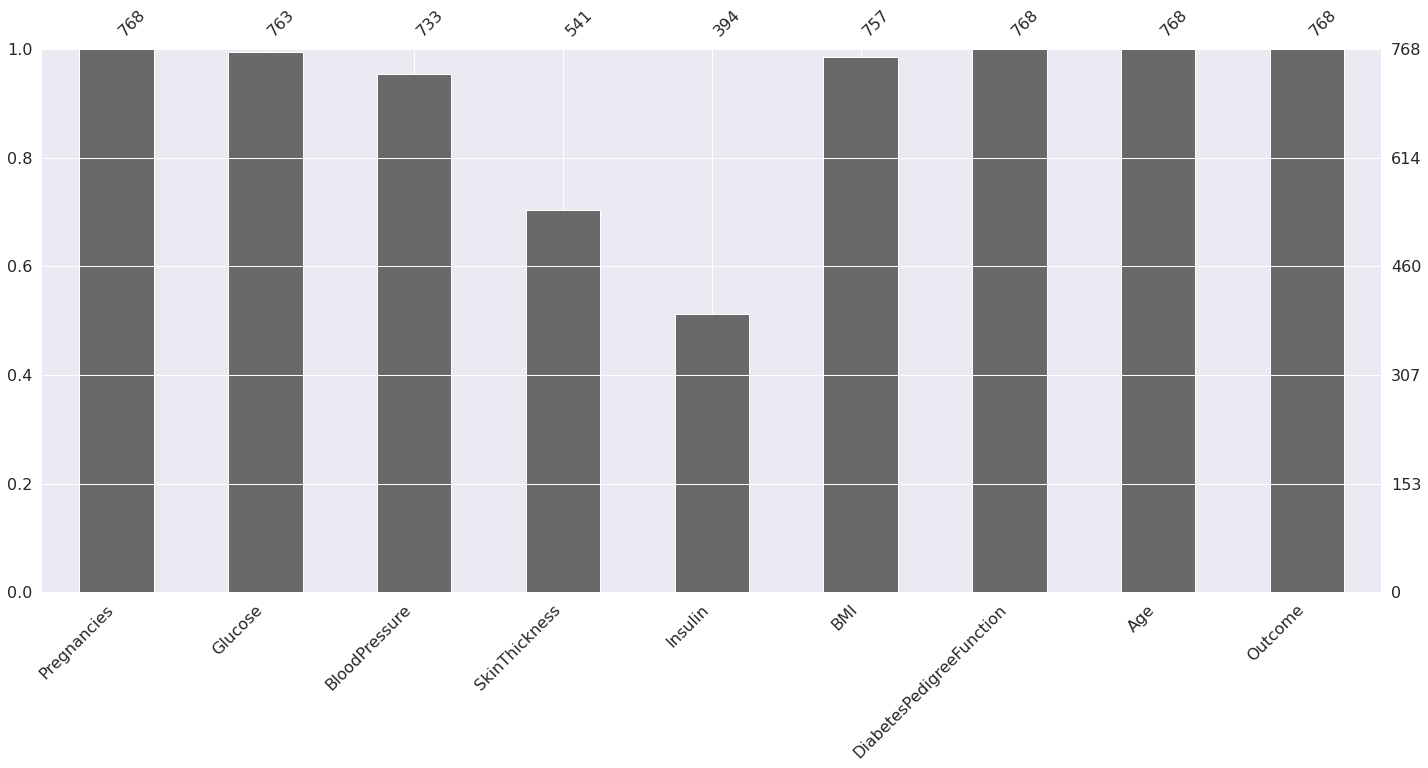

In [496]:
import missingno as msno 
msno.bar(df) 

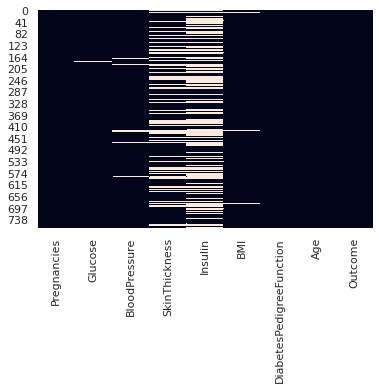

In [497]:
sns.heatmap(df.isnull(), cbar=False)

**(b) Report mean and median discrepancies in the features**

**Displaying the Median values of each column**

In [498]:
df.mean(axis=0)

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [499]:
df.median(axis=0)

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

Filling mean values for missing values.

In [500]:
df= df.fillna(df.mean())

In [501]:
df.median(axis=0)

Pregnancies                   3.000000
Glucose                     117.000000
BloodPressure                72.202592
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.400000
DiabetesPedigreeFunction      0.372500
Age                          29.000000
Outcome                       0.000000
dtype: float64

In [502]:
df.mean(axis=0)

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [503]:
missing_values_tables(df)

Your selected dataframe has 9 columns.
 There are 0 columns that have missing values.


,Missing Values,% of Total Values


Validating outliers

<Figure size 432x288 with 0 Axes>

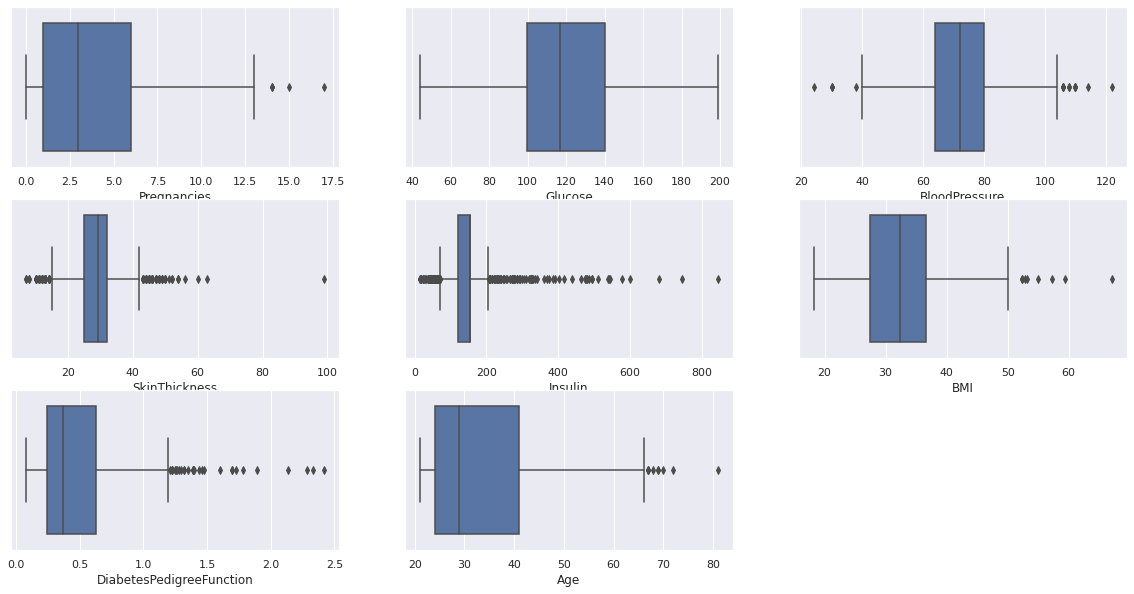

In [504]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(1) 
plt.figure(figsize=(20,10))
plt.subplot(331)
sns.boxplot(df['Pregnancies'])
plt.subplot(332)
sns.boxplot(df['Glucose'])
plt.subplot(333)
sns.boxplot(df['BloodPressure'])
plt.subplot(334)
sns.boxplot(df['SkinThickness'])
plt.subplot(335)
sns.boxplot(df['Insulin'])
plt.subplot(336)
sns.boxplot(df['BMI'])
plt.subplot(337)
sns.boxplot(df['DiabetesPedigreeFunction'])
plt.subplot(338)
sns.boxplot(df['Age'])

For medical data we cannot handle outliers so we are not normalising the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05ea8661d0>,
      dtype=object)

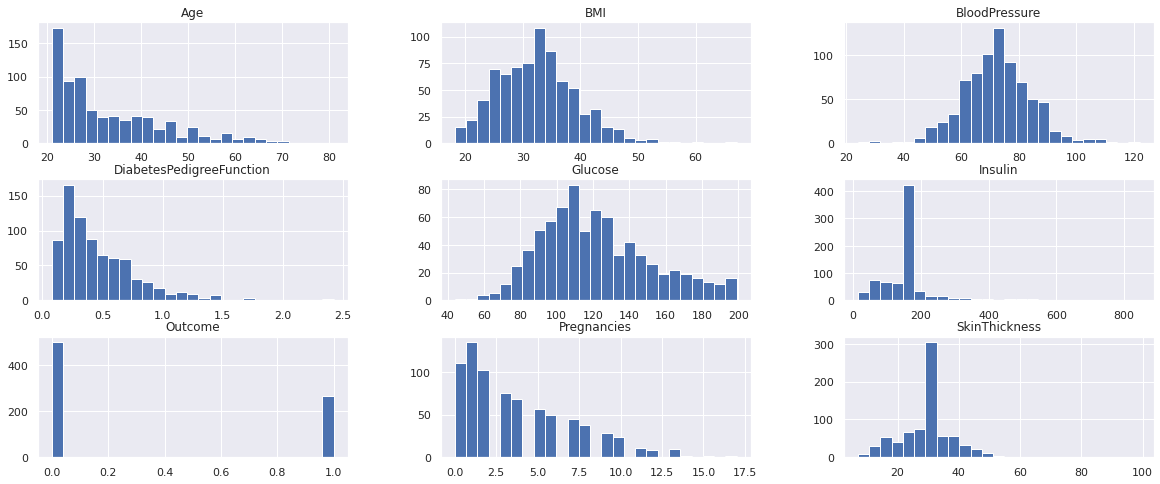

In [505]:
df.hist(bins=25,figsize=(20,8))

### **Q 2.	Visualize the feature relationships** 
**(a) Pairwise Plot**

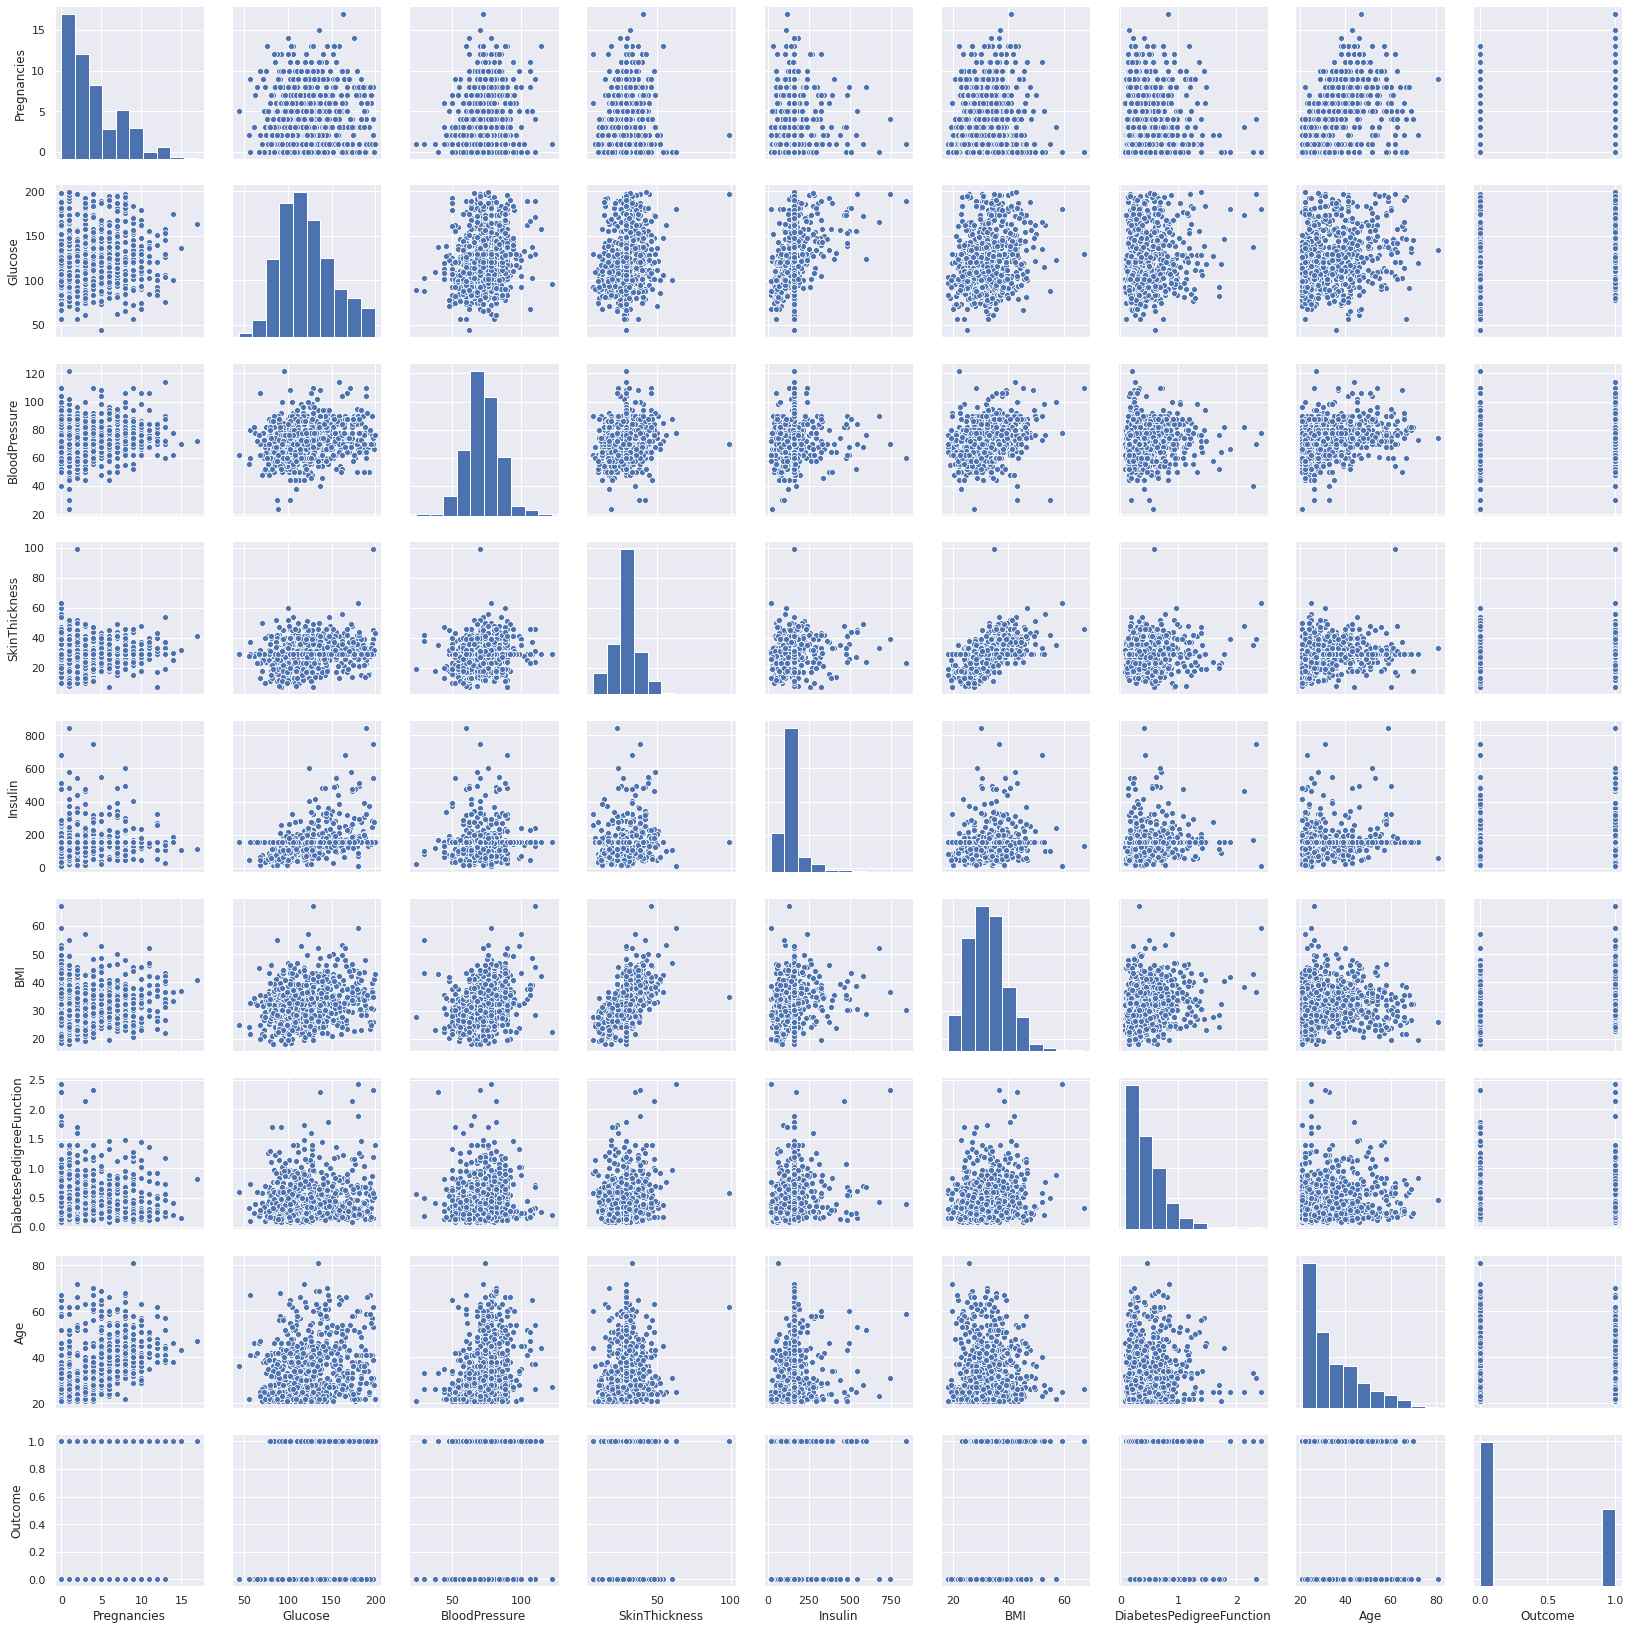

In [506]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df)

**(b) Heat Map Plot for correlation**

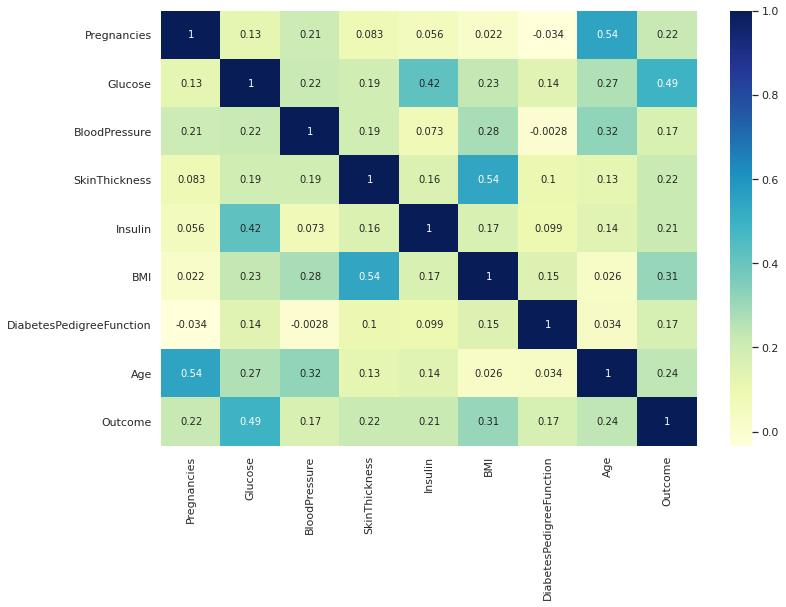

In [507]:
# Correlation 
corr=df.corr()
f,ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", ax=ax)

### **Q 3. Split the Data** 

Number of person Not having Diabetes :  500
Number of person having Diabetes :  268


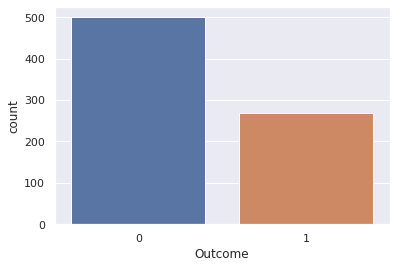

In [508]:
sns.countplot(data=df, x = 'Outcome', label='Count')

NLD,LD = df['Outcome'].value_counts()
print('Number of person Not having Diabetes : ',NLD)
print('Number of person having Diabetes : ',LD)

**(a) Divide into features and target**

In [509]:
X = df.drop(['Outcome'], axis=1)
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32


In [510]:
y = df['Outcome'] # 1 for Diabetes disease; 0 for no Diabetes disease
y.head(3)

0    1
1    0
2    1
Name: Outcome, dtype: int64

**(b) Divide into training and testing**

**(c) Ensure that data is divided with more or less equal ration of class 1 and 0 in both test and train set**

for unbalanced datasets we have to use startified splitting of train and test data to have the more or less equal ration.

In [511]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model

In [512]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
sss.get_n_splits(X, y)
print(sss)


StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.3,
            train_size=None)


In [513]:
for train_index, test_index in sss.split(X, y):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index] 

###**Q-4: Build a classifier model using Support Vector Machine**

**(a) Scale the Feature**

In [514]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(X_train)

In [515]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train =  pd.DataFrame(sc_X.fit_transform(X_train,axis = 1),),
#         columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [516]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(X_train)

**(b) Train the Model**

In [517]:
from sklearn.svm import SVC
# model = SVC(kernel='linear',C=10)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)


In [518]:
def cparameter(i,p_kernal):
    model = SVC(kernel=p_kernal,C=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
    print (matrix)

In [519]:
l = [0.1,1,10]
for i in l:
    print("for the value of c = ", i)
    cparameter(i,'linear')

for the value of c =  0.1
0.7705627705627706
[[132  18]
 [ 35  46]]
for the value of c =  1
0.7662337662337663
[[132  18]
 [ 36  45]]
for the value of c =  10
0.7748917748917749
[[132  18]
 [ 34  47]]


In [520]:
l = [0.1,1,10]
for i in l:
    print("for the value of c = ", i)
    cparameter(i,'poly')

for the value of c =  0.1
0.7359307359307359
[[137  13]
 [ 48  33]]
for the value of c =  1
0.7489177489177489
[[135  15]
 [ 43  38]]
for the value of c =  10
0.7619047619047619
[[134  16]
 [ 39  42]]


**(C) Predict the model with the best parameters**

From the above parameters i felt c alue should be 10 and the kernal would be linear.

In [521]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

###**Q-5: Measure Accuracy**

In [522]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

**(a) Confusion Matrix**

0.7748917748917749
[[132  18]
 [ 34  47]]


Text(0.5, 12.5, 'Predicted label')

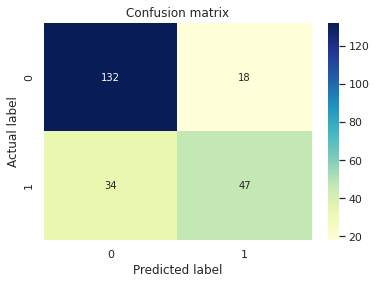

In [523]:
matrix = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print (matrix)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
p = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**(b) Classification Report**

In [524]:
from sklearn.metrics import confusion_matrix, classification_report
print ("Classification Report")
print(classification_report(y_test, y_pred))


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.72      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [525]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7748917748917749
